## Random Forest Hyper Paramaters


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel("rice.xlsx")

In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [6]:
df["Class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

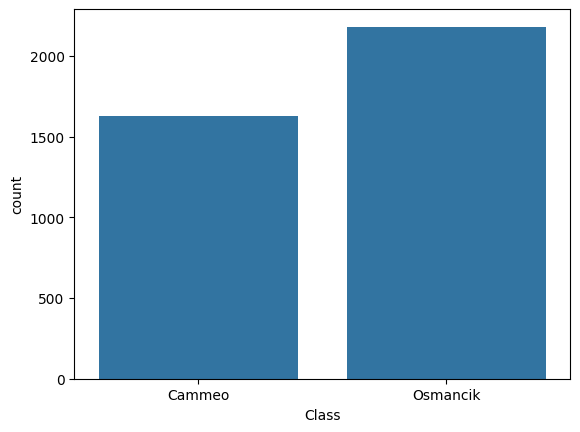

In [7]:
sns.countplot(x="Class" , data=df)

In [8]:
df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [9]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [10]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

<Axes: xlabel='Area', ylabel='Perimeter'>

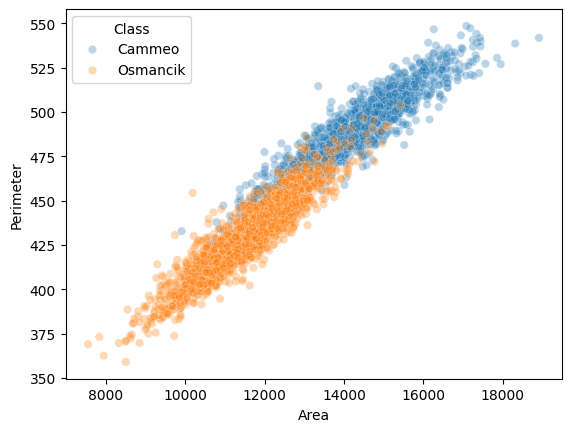

In [11]:
sns.scatterplot(x="Area" , y="Perimeter" , data= df , alpha=0.3 , hue="Class")

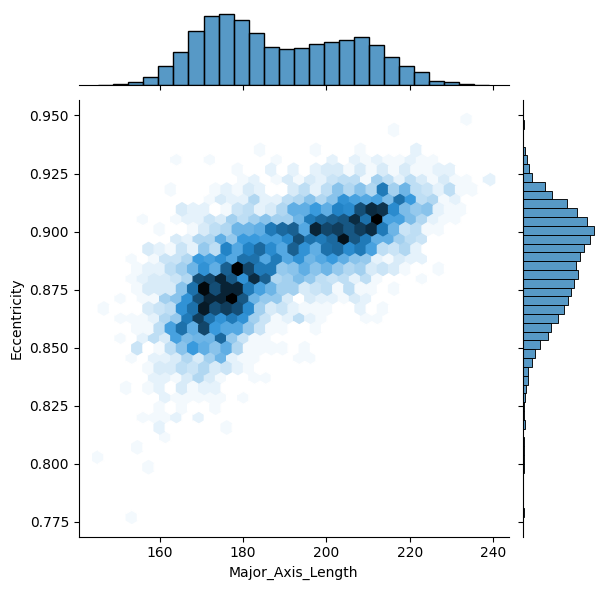

In [12]:
sns.jointplot(kind="hex", x="Major_Axis_Length", y="Eccentricity" , data=df)

Renk ne kadar koyu ise o kadar veri var demektir

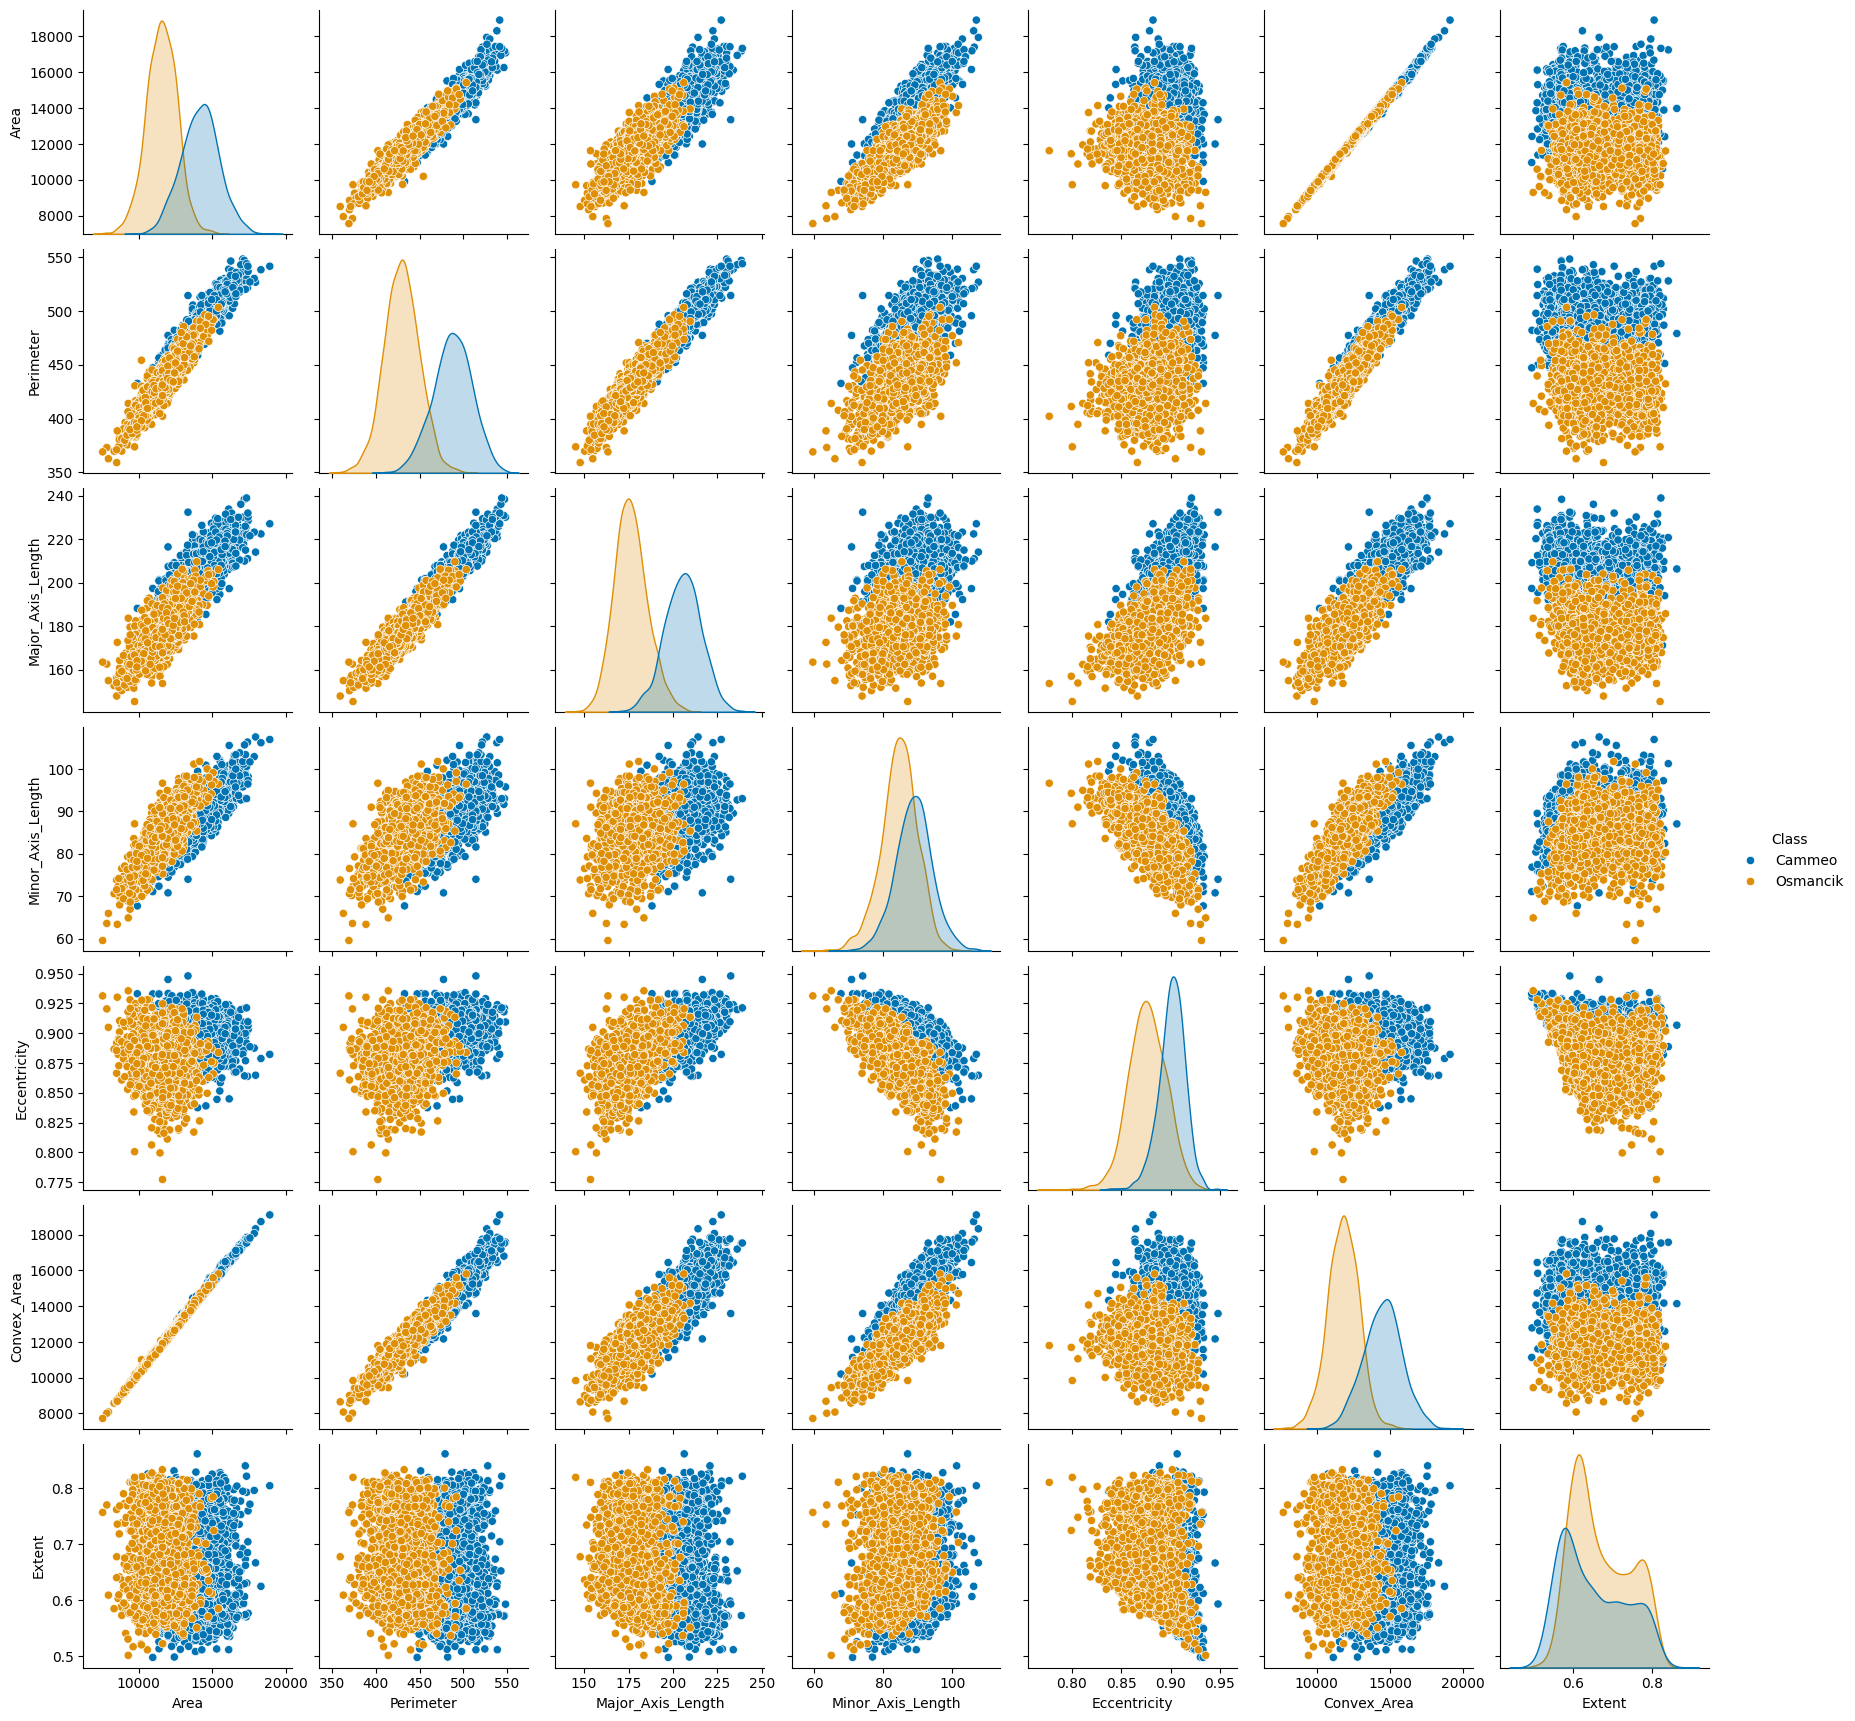

In [13]:
sns.pairplot(df , hue="Class" , palette="colorblind")

In [14]:
df.corr(numeric_only=True)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


<Axes: >

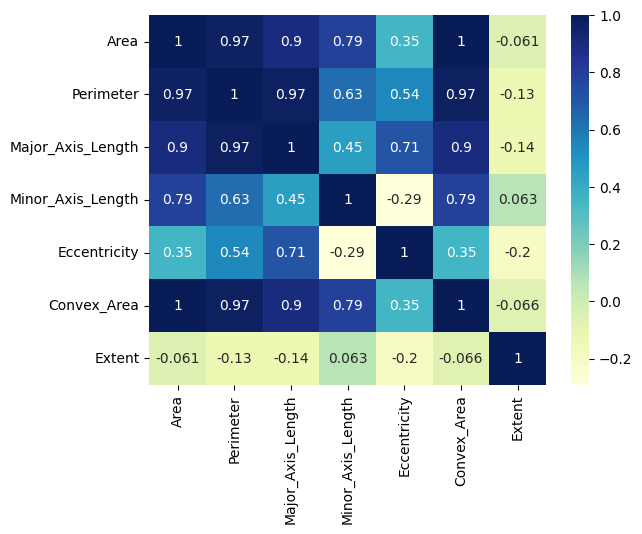

In [15]:
sns.heatmap(df.corr(numeric_only=True) , annot=True,cmap="YlGnBu")

#cmap="YlGnBu" : Yellow Green Blue renkerline çevirdi
#cmap=plt.cm.YlGnBu olarak da yazılabilir

## Train Test Split

In [ ]:
x= df.drop("Class" , axis=1)
y=pd.get_dummies(df["Class"] , drop_first=True)

In [19]:
# Drop_first=True dendiğinde ilk sütünü düşürüyor
# Yani ilk değer gözükmeyecektir.
y

,Osmancik
0,False
1,False
2,False
3,False
4,False
...,...
3805,True
3806,True
3807,True
3808,True


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.1, random_state=9)

# Veri büyük olduğundan test_size ı küçük girdik
# Diğer verilerin 4 katı büyük veriye sahibiz

In [24]:
len(X_train) 


3429

In [25]:
len(X_test) # Test edilen değer neredeyse diğer veri setlerindekiyle aynı

381

# Hiper Orman

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_est = [9,64,128,200]
max_feat= [1,2,3,4]

bootstrap_sec = [True,False]
# Gridsearch true mu false mu diye seçecek.
# False ise her ağaç için bütün verileri kullanacak (3429 veri için)
# True ise hepsini değil bir kaç tanesini seçecek

oob=[True , False]
# Bootstrap yalnızca true iken çalışır
# Seçilen veriler dışında bir veri eklenip eklenmeyeceği
# Kontrol açısından farklı veri ekleyeyim mi ? 
# out of bed

In [49]:
parameters={
    "n_estimators":n_est,
    "max_features":max_feat , 
    "bootstrap":bootstrap_sec,
    "oob_score":oob
    }

In [50]:
random_forest = RandomForestClassifier()

In [51]:
grid = GridSearchCV(random_forest,parameters)

In [52]:
grid.fit(X_train,y_train)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [53]:
grid.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=128)

kendisi en iyi değeri yerine koyacaktır

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 1, 'n_estimators': 128, 'oob_score': False}

Çıkan sonuçlarda;
* İçerisinden belirli verileri seç ama dışarıdan bir şey ekleme

In [54]:
pilav_pred = grid.predict(X_test)

## Değerlendirme

In [56]:
from sklearn.metrics import  ConfusionMatrixDisplay , classification_report 

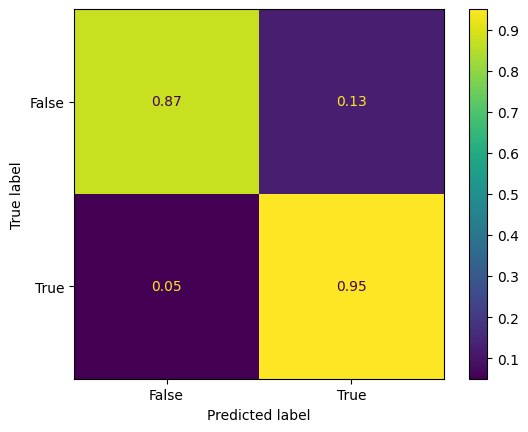

In [60]:
ConfusionMatrixDisplay.from_estimator(grid ,X_test , y_test , normalize="true")

In [59]:
print(classification_report(y_test,pilav_pred))
# False camooen birinci değer
# True osmancık yani 2. değer

              precision    recall  f1-score   support

       False       0.94      0.87      0.91       182
        True       0.89      0.95      0.92       199

    accuracy                           0.91       381
   macro avg       0.92      0.91      0.91       381
weighted avg       0.92      0.91      0.91       381



## Estimater Sayısı Belirleme

In [63]:
from sklearn.metrics import  accuracy_score

In [ ]:
hata=[]
yanlıs_secim=[]

for n in range(1,130):
    rand_forest_class = RandomForestClassifier(n_estimators=n,                                              
                                               bootstrap=True,
                                               oob_score=False,
                                               max_features=1)
    
    rand_forest_class.fit(X_train,y_train)
    pirinc_pred = rand_forest_class.predict(X_test)
    error = 1- accuracy_score(y_test,pirinc_pred)

    sample= y_test.to_numpy() # Tahmin edilen değer olduğundan y_test
    sample =sample.reshape(1,-1)[0]

    n_missed = np.sum(pirinc_pred != sample)
    hata.append(error)
    yanlıs_secim.append(n_missed)



C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

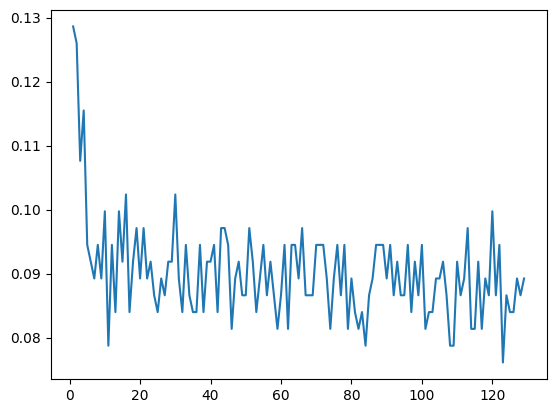

In [77]:
plt.plot(range(1,130) , hata)

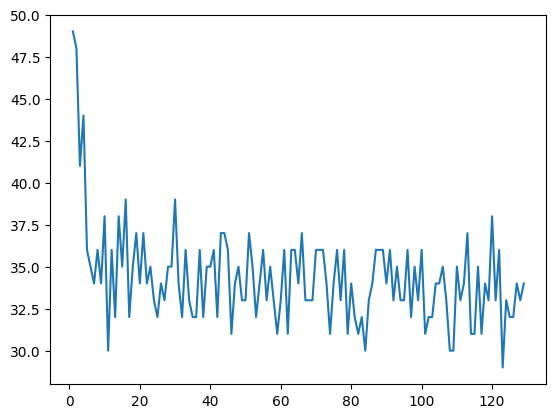

In [76]:
plt.plot(range(1,130) , yanlıs_secim)

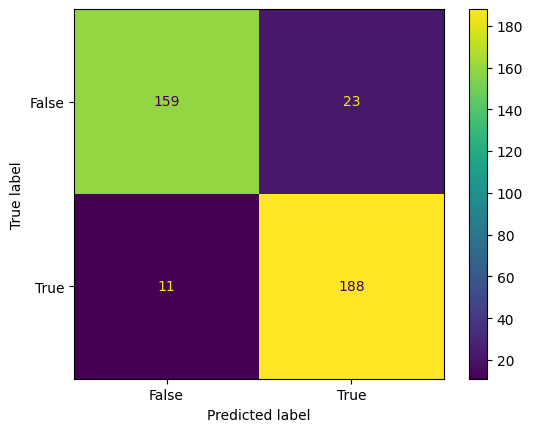

In [78]:
ConfusionMatrixDisplay.from_estimator(rand_forest_class ,X_test , y_test )

In [79]:
print(classification_report(y_test,pirinc_pred))
# False camooen birinci değer
# True osmancık yani 2. değer

              precision    recall  f1-score   support

       False       0.94      0.87      0.90       182
        True       0.89      0.94      0.92       199

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381

